# Lesson 1 Homework

## Recreating the lesson notebook

First we make sure that the plots are created inline

In [1]:
%matplotlib inline

Next we import the necessary libraries

In [1]:
from __future__ import division,print_function

import numpy as np
np.set_printoptions(precision=4, linewidth=100)
import os, json
from glob import glob
from matplotlib import pyplot as plt

Next we import the plotting function from the utils file

In [2]:
import utils; reload(utils)
from utils import plots

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using TensorFlow backend.


Defining the path variable for sample

In [7]:
path='data/dogscats/sample/'

Importing our vgg model

In [5]:
import vgg16; reload (vgg16)
from vgg16 import Vgg16

Create a vgg object

In [6]:
vgg = Vgg16()

ValueError: Negative dimension size caused by subtracting 2 from 1 for 'MaxPool_3' (op: 'MaxPool') with input shapes: [?,1,112,128].

Create the batches from our training data

In [9]:
batches = vgg.get_batches(path=path+'train/',batch_size=4)

Found 16 images belonging to 2 classes.


Create arrays of images and labels which will be used for plotting

In [10]:
imgs, labels = next(batches)

Plot the images in the current batch

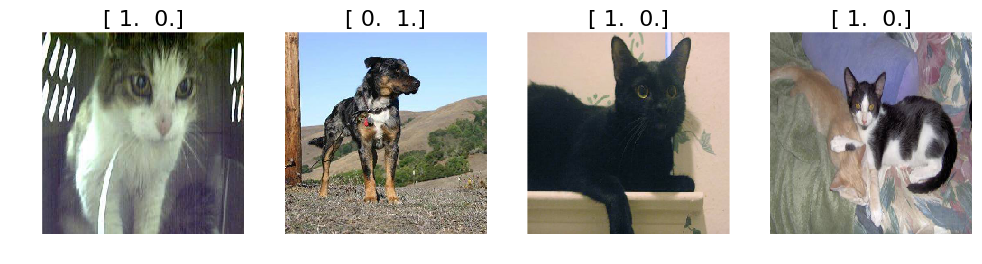

In [11]:
plots(imgs, titles=labels)

Now use the existing model to predict the images from the batches

In [89]:
??vgg.predict(imgs, True)

See the classes Vgg used for prediction

In [13]:
vgg.classes[:4]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark']

Get the validated batches to test our model against

In [14]:
val_batches = vgg.get_batches(path=path+'valid/', batch_size=4)

Found 8 images belonging to 2 classes.


Now finetune our model so that its classes are configured according to the labels it gets from our data

In [15]:
vgg.finetune(batches)

Now train our finetuned model using our training data and then test against our valid data using the fit function

In [16]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
16/16 [==============================] - 0s - loss: 1.6450 - acc: 0.5625 - val_loss: 0.4933 - val_acc: 0.7500


In [18]:
#Checking out the updated classes
vgg.classes[:2]


['cats', 'dogs']

In [28]:
??vgg.predict(imgs, True)

### Training the model on the entire data

First redifining the path variable

In [44]:
path='data/dogscats/'

Increasing the batch size

In [21]:
batch_size=64

Now getting the batches and finetuning, fitting our model accordingly

In [22]:
batches = vgg.get_batches(path=path+"train/", batch_size=batch_size)
val_batches = vgg.get_batches(path=path+"valid/", batch_size=batch_size)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/1
23000/23000 [==============================] - 639s - loss: 0.1260 - acc: 0.9675 - val_loss: 0.0566 - val_acc: 0.9865


Testing on testing data

In [90]:
test_batches = vgg.get_batches(path=path+'test1/', batch_size=64, class_mode=None)

Found 12500 images belonging to 1 classes.


In [91]:
for imgs in test_batches:
    print(vgg.predict(imgs))

(array([ 1.    ,  1.    ,  1.    ,  1.    ,  0.9999,  1.    ,  1.    ,  0.9989,  1.    ,  1.    ,
        1.    ,  1.    ,  0.9999,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
        1.    ,  1.    ,  1.    ,  1.    ,  0.5588,  1.    ,  0.8579,  0.9994,  1.    ,  1.    ,
        1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
        0.9998,  0.9988,  1.    ,  1.    ,  1.    ,  0.9998,  1.    ,  1.    ,  1.    ,  1.    ,
        1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
        0.9626,  1.    ,  1.    ,  1.    ], dtype=float32), array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0]), ['dogs', 'cats', 'cats', 'dogs', 'cats', 'dogs', 'cats', 'dogs', 'cats', 'dogs', 'cats', 'dogs', 'dogs', 'cats', 'cats', 'dogs', 'cats', 'dogs

KeyboardInterrupt: 

# Training the model for Kaggle Data

Resseting the path for the kaggle data

In [45]:
path="data/dogscats-redux/"

## Creating and running the model

In [46]:
batch_size = 64
vgg = Vgg16()

Getting the batches

In [17]:
batches = vgg.get_batches(path=path+"train/", batch_size=batch_size)
valid_batches = vgg.get_batches(path=path+"valid/", batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Finetuning and fitting our model

In [19]:
vgg.finetune(batches)
vgg.fit(batches, valid_batches, nb_epoch=1)

Epoch 1/1
23000/23000 [==============================] - 645s - loss: 0.1314 - acc: 0.9661 - val_loss: 0.0582 - val_acc: 0.9815


Saving model

In [ ]:
vgg.model.save_weights('lesson_1_20_epochs_weights.h5')

In [47]:
vgg.model.load_weights('lesson_1_20_epochs_weights.h5')

In [71]:
path="data/dogscats-redux/"
print('testing started')
test_batches, pred = vgg.test(path+"test", batch_size=64)
print('testing finished')

testing started
Found 12500 images belonging to 1 classes.
testing finished


In [79]:
import csv #importing the csv model
with open('result.csv', 'wb') as f:
    writer = csv.writer(f)
    writer.writerow(["id","label"])
    filenames=test_batches.filenames
    pred_dog = zip(*pred)[1]
    pred_dog = np.clip(pred_dog, (1 - 0.99), 0.99)
    print("writing to file now")
    for i in xrange(len(filenames)): #writing to the csv file
        print(i)
        writer.writerow([filenames[i][5:].replace(".jpg",""),"{0}".format(pred_dog[i])])
    

writing to file now
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
27

In [48]:
vgg.model.summary()


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_3 (Lambda)                (None, 3, 224, 224)   0           lambda_input_3[0][0]             
____________________________________________________________________________________________________
zeropadding2d_27 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_3[0][0]                   
____________________________________________________________________________________________________
convolution2d_27 (Convolution2D) (None, 64, 224, 224)  1792        zeropadding2d_27[0][0]           
____________________________________________________________________________________________________
zeropadding2d_28 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_27[0][0]           
___________________________________________________________________________________________

In [20]:
vgg.classes


['cats', 'dogs']

In [21]:
import coremltools

In [23]:
coreml_model = coremltools.converters.keras.convert(vgg)

RuntimeError: keras not found or unsupported version or backend found. keras conversion API is disabled.

In [56]:
from keras import backend as K
from keras.utils.np_utils import convert_kernel
import tensorflow as tf

In [50]:
ops = []
for layer in vgg.model.layers:
   if layer.__class__.__name__ in ['Convolution1D', 'Convolution2D', 'Convolution3D', 'AtrousConvolution2D']:
      original_w = K.get_value(layer.W)
      converted_w = convert_kernel(original_w)
      ops.append(tf.assign(layer.W, converted_w).op)


AttributeError: 'str' object has no attribute '_is_ref_dtype'

In [57]:
print(K.backend())

theano


In [7]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import numpy as np

from keras import backend as K
K.set_image_dim_ordering('th')

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model


In [9]:
model = VGG_16('lesson_1_20_epochs_weights.h5')

AttributeError: 'module' object has no attribute 'pack'